In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('F:\mahmoud ali\oasis project\Task 3\\apps.csv')
print(df.head())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967  2.8M     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB
None


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')


In [5]:
print(df['Reviews'].value_counts())

0         593
1         272
2         213
3         170
4         137
         ... 
157506      1
351254      1
49211       1
88860       1
398307      1
Name: Reviews, Length: 5330, dtype: int64


In [6]:
df.dropna(inplace=True)

In [7]:
def get_sentiment(rating):
    if rating >= 4.0:
        return 'positive'
    elif rating < 2.5:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['Rating'].apply(get_sentiment)


In [8]:
print(df['sentiment'].value_counts())

positive    5291
neutral     1605
negative     125
Name: sentiment, dtype: int64


In [9]:
import re
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))  
    text = text.lower()  
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)  
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

df['cleaned_reviews'] = df['Reviews'].apply(preprocess_text)



In [10]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_reviews']).toarray()
y = df['sentiment']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [13]:
y_pred = model.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

    negative       1.00      0.00      0.00        28
     neutral       0.29      0.01      0.01       327
    positive       0.75      1.00      0.85      1050

    accuracy                           0.75      1405
   macro avg       0.68      0.33      0.29      1405
weighted avg       0.65      0.75      0.64      1405



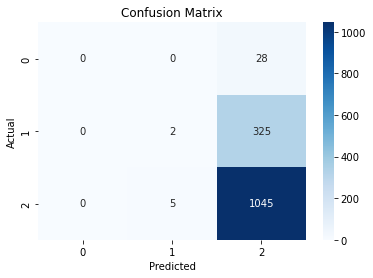

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


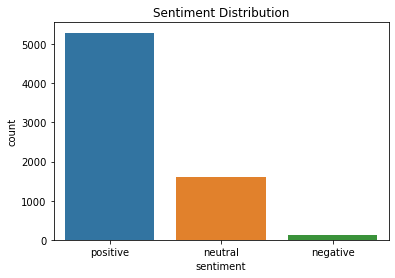

In [16]:
sns.countplot(df['sentiment'])
plt.title('Sentiment Distribution')
plt.show()

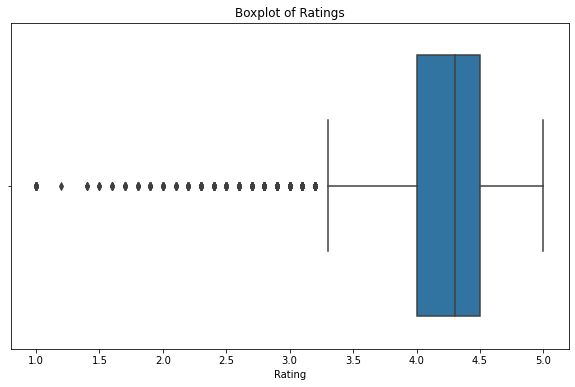

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rating']) 
plt.title('Boxplot of Ratings')
plt.show()

Recommendations
Enhance Review Quality: Encourage users to provide detailed and clear reviews to improve the accuracy of sentiment analysis.
Try More Complex Machine Learning Models: If the current model accuracy is low, consider using advanced models like SVM or neural networks for better results.
Expanded Sentiment Analysis: Add a more detailed sentiment analysis to differentiate between various impacts of reviews and ratings.
Customer Engagement Based on Sentiments: Quickly address feedback from customers with negative sentiments to improve their experiences